# Session4. 파이썬 라이브러리 활용 기초  
1. ‘데이터셋’ 폴더의 CCTV_in_Seoul.csv, population_in_Seoul.csv를 이용, pandas / numpy를 통해 아래 와 같은 형태로 데이터를 정리해 볼 것. (‘외국인비율’ = ‘외국인’ / ‘인구수’ * 100, ‘고령자비율’ = ‘고령자’ / ‘인구수’ * 100, ‘오차’ – l소계 – 회귀직선(인구수)l , 오차는 np.abs를 활용)  
2. (1)에서 정리한 데이터를 ‘오차’ 컬럼을 기준으로 색깔을 입혀서 시각화 해보고, 이를 통해 무엇을 파악할 수 있 는지 주석으로 간략하게 1-2줄로 서술해보기. (plt.colormap, plt.text 로 컬러맵과 이름 추가)

In [8]:
import pandas as pd
import numpy as np

In [9]:
cctv_raw = pd.read_csv("session4_dataset/CCTV_in_Seoul.csv")
pop_raw = pd.read_excel("session4_dataset/population_in_Seoul.xls", header = 2, usecols = 'B, D, G, J, N', encoding = 'utf-8')

In [11]:
pop = pop_raw.drop([0])
pop.rename(columns={'자치구':'구별','계':'인구수', '계.1':'한국인', '계.2':'외국인', '65세이상고령자':'고령자'}, inplace=True)
pop.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767
5,광진구,371063,355559,15504,45619


In [12]:
cctv = cctv_raw.rename(columns={'기관명':'구별', '2013년도 이전':'y2013', '2014년': 'y2014', '2015년':'y2015', '2016년':'y2016'})
cctv.head()

,구별,소계,y2013,y2014,y2015,y2016
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [13]:
cctv['최근증가율'] = ((cctv.y2014 + cctv.y2015 + cctv.y2016) / cctv.y2013)*100
cctv.head()

,구별,소계,y2013,y2014,y2015,y2016,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [14]:
df = pd.merge(pop, cctv[['구별', '소계', '최근증가율']], on='구별')
df.set_index('구별', inplace=True)
df.head()

,인구수,한국인,외국인,고령자,소계,최근증가율
구별,,,,,,
종로구,163026,153065,9961,26742,1619,248.922414
중구,135633,125725,9908,22005,1023,147.699758
용산구,245090,228999,16091,37640,2096,53.216374
성동구,316463,308221,8242,42767,1327,81.780822
광진구,371063,355559,15504,45619,878,53.228621


## Problem 1

In [15]:
#'외국인비율’ = ‘외국인’ / ‘인구수’ * 100
df['외국인비율'] = (df['외국인']/df['인구수'])*100
#‘고령자비율’ = ‘고령자’ / ‘인구수’ * 100
df['고령자비율'] = (df['고령자']/df['인구수'])*100
df.head()

,인구수,한국인,외국인,고령자,소계,최근증가율,외국인비율,고령자비율
구별,,,,,,,,
종로구,163026,153065,9961,26742,1619,248.922414,6.110068,16.403518
중구,135633,125725,9908,22005,1023,147.699758,7.305007,16.223928
용산구,245090,228999,16091,37640,2096,53.216374,6.565343,15.357624
성동구,316463,308221,8242,42767,1327,81.780822,2.604412,13.514060
광진구,371063,355559,15504,45619,878,53.228621,4.178266,12.294139


In [16]:
#‘오차’ – |소계 – 회귀직선(인구수)| , 오차는 np.abs를 활용
import statsmodels.api as sm
mod = sm.OLS(df['소계'], df['인구수'])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     소계   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     117.8
Date:                Tue, 26 Mar 2019   Prob (F-statistic):           9.69e-11
Time:                        19:33:47   Log-Likelihood:                -198.20
No. Observations:                  25   AIC:                             398.4
Df Residuals:                      24   BIC:                             399.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
인구수            0.0035      0.000     10.854      0.000       0.003       0.004
==============================================================================
Omnibus:                        0.110   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.946   Jarque-Bera (JB):                0.264
Skew:                          -0.132   Prob(JB):                        0.876
Kurtosis:                       2.572   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# 값이 슬라이드랑 다른데ㅜㅜ 모델이 다른건가...
df['오차'] = np.abs(df['소계'] - res.predict())
df.head()

,인구수,한국인,외국인,고령자,소계,최근증가율,외국인비율,고령자비율,오차
구별,,,,,,,,,
종로구,163026,153065,9961,26742,1619,248.922414,6.110068,16.403518,1043.055024
중구,135633,125725,9908,22005,1023,147.699758,7.305007,16.223928,543.830144
용산구,245090,228999,16091,37640,2096,53.216374,6.565343,15.357624,1230.135940
성동구,316463,308221,8242,42767,1327,81.780822,2.604412,13.514060,208.986463
광진구,371063,355559,15504,45619,878,53.228621,4.178266,12.294139,432.906669


## Problem 2

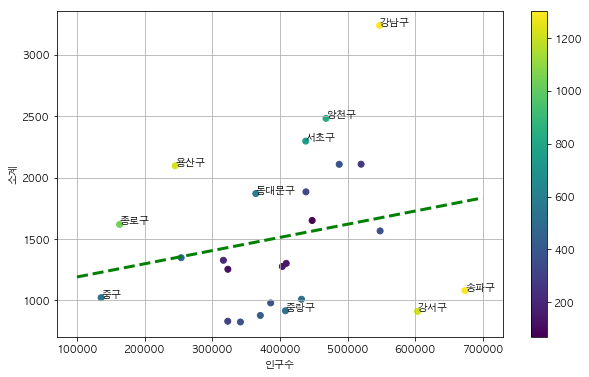

In [18]:
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 한글 설정
    rc('font', family = 'AppleGothic')
    
    
df = df.sort_values(by='오차', ascending=False) # 후에 오차가 높은 구만 annotate하기 위해 정렬
    
fig = plt.figure(figsize=(10,6))
colormap = df['오차']
plt.scatter(df['인구수'], df['소계'], c=colormap)

# add regression line
fp1 = np.polyfit(df['인구수'], df['소계'], deg=1)
f1 = np.poly1d(fp1)
xrange = np.linspace(100000, 700000, 100)
plt.plot(xrange, f1(xrange), ls='dashed', lw=3, color ='g')

# annotate
# https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point
for i, txt in enumerate(df.index.values[:10]): # annotate datapoints with top 10 residual
    plt.annotate(txt, (df['인구수'][i], df['소계'][i]))

plt.xlabel('인구수')
plt.ylabel('소계')
plt.colorbar()
plt.grid()
plt.show()